# Ismerkedés a [sympy](www.sympy.org) modullal

Számos kereskedelmi ([Mathematica](https://www.wolfram.com/mathematica/), [Maple](http://www.maplesoft.com/products/maple/)) számítógépes algebrai csomag létezik már, melyek bonyolult analitikusformula-manipulációs készséggel rendelkeznek. A `sympy` csomag egy ingyenes nyílt forráskódú `python` modul, ami használható alternatívát kínál kereskedelmi vetélytársaival szemben. Ebben a notebookban néhány `sympy` függvénnyel fogunk megismerkedni. 
Mielőtt fejest ugranánk a modul ismertetésébe, álljon itt az alábbi két kép figyelmeztetésül:

<table>
<tr>
<td style="border: 1px solid #ffffff"><img src="http://lghttp.30059.nexcesscdn.net/80C479/magento/media/catalog/product/cache/1/image/330x330/140720ac20424209c6bb28e1b7731856/s/p/sp-kidcane.jpg" width=200></img> </td>
<td style="border: 1px solid #ffffff">vs.</td>
<td style="border: 1px solid #ffffff"><img src="http://nsms6thgradesocialstudies.weebly.com/uploads/3/7/2/4/37241339/1021698_orig.jpg" width=200></img> </td>
</tr>
</table>

Általában ugyanis igaz az, hogy a hétköznapi felhasználók (alapvetően diákok) hajlamosak túlságosan megbízni ezekben a formulamanipulációs programcsomagokban. Sokszor hallani oktatási intézmények folyosóin, hogy: 'Még a Mathematica se tudta kiszámolni!' Ezek a programcsomagok nem mindentudó [orákulumok](https://en.wikipedia.org/wiki/Oracle)! Alapvetően inkább mankóként tekintsünk rájuk, amit a saját készségeinkhez próbálunk igazítani, s nem mint egy mindent tudó feketedobozra amely minden kérdésre tévedhetetlenül a pontos választ adja. 

**Fontos** megjegyezni, hogy mivel van pár, a `sympy` függvényeihez hasonló nevű függvény a `pylab` parancs által importált modulokban, ezért a kellemetlenségek elkerülése végett célszerű - legalábbis a házi feladatok megoldása során - mindig külön notebookot indítani a `sympy`-os problémák megoldásánál!
Ezen felül a már megszokott `%pylab inline` helyett `%matplotlib inline` -al kezdjük a notebookokat, hogy az esetlegesen megjeleníteni kívánt ábrák jól működjenek!

In [1]:
# Figyelem az alábbi parancs csak az ábrázolásra készíti fel a környezetet
%matplotlib inline
# Ez a két parancs pedig a szimbolikus számításra
from sympy import * # a sympy csomag rutinjainak betöltése
init_printing()     # szép kimenet  

## Változók, egyenletek és egyenletrendszerek megoldása
Ahhoz, hogy változókat szimbolikusan is manipulálni tudjunk, meg kell mondanunk a Pythonnak, hogy ezentúl tekintsen a változónkra mint valamilyen matematikai formulában előforduló szimbólumra. Ezt a legegyszerűbben így tehetjük meg:

In [2]:
x=symbols('x')

Ezek után az $x$ változót használhatjuk szimbolikus számításokra. Oldjuk meg például a következő egyszerű egyenletet: $$3x=5$$
Ezt a `solve` függvény segítségével tehetjük meg. A `solve` függvény első bementete a megoldandó egyenlet 0-ra rendezve, a második pedig a keresett változó:

In [3]:
solve(3*x-5,x)

Definiáljunk néhány további változót is!

In [4]:
y,z,a,b,c=symbols('y,z,a,b,c') # Így definiálunk egyszerre több változót

In [5]:
k,l=symbols('k,l',integer=True) # Így specifikáljuk hogy a defiiált változók egész számok
p,q=symbols('p,q',real=True) # Így pedig hogy valósak

Oldjuk meg most az $$a x+b=y$$ egyenletet $x$ -re!

In [6]:
solve(a*x+b-y,x)

Ha több megoldása is van az egyenletnek, akkor a `sympy` `solve` függvénye lehetőség szerint mind a kettőt megtalálja. Jól mutatja ezt a másodfokú egyenlet megoldásának "megtalálása":

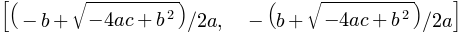

In [7]:
solve(a*x**2+b*x+c,x)

Természetesen a megoldás nem feltétlenül valós szám! A komplex egységgyököt a `sympy` `I`-vel jelöli:

In [8]:
I**2

A `solve` függvényt egyenletrendszerek megoldására is lehet használni. Ilyenkor a nullára rendezett egyenleteket listába foglaljuk. A keresett változókat szintúgy. Oldjuk meg a következő egyenletrendszert az $x$ és $y$ változókra:
$$y=x^2+ax-4b$$
$$y=x-b$$
Mivel $x$-ben másodrendű az első egyenlet, ezért két megoldáspárt várunk (A parabola legfeljebb két helyen metszi az egyenest...)

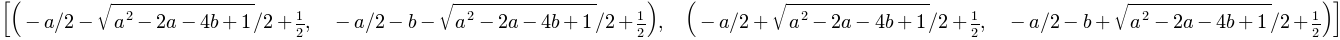

In [9]:
solve([x**2 + a*x - y, x - y - b],[x,y]) # Így kell egyenletrendszert megoldani


A `solve` függvény kimenete most egy lista, amelynek az elemei a megfelelő $(x,y)$ párok.

## Behelyettesítés és kiértékelés

Sokszor előfordul, hogy analitikus számítások során a képletek egyszerűsítése végett egy-egy gyakran ismétlődő kifejezésre az ember bevezet egy rövidítést. A számolás befejeztével ezeket a rövidítéseket vissza kell helyettesíteni az eredeti megfelelőikkel a végeredménybe. Ilyen és ehhez hasonló helyettesítésekre alkalmazható a `subs()` metódus, mely a `sympy` minden kifejezés objektumának metódusa. Lássunk erre egy példát! Legyen egy számolás eredménye $x^2+ax-y$, és legyen ez az eredmény a `valami` változóban eltárolva:

In [10]:
valami=x**2 + a*x - y
valami

Tegyük most fel, hogy korábban az $y$-t az $x^3$ kifejezés helyettesítésére vezettük be, és most vissza akarjuk vezetni. Ekkor a `subs` metódus az alábbiak szerint alkalmazható:

In [11]:
valami.subs(y,x**3)

A számítások végrehajtásának utolsó lépése, hogy numerikusan kiértékeljük az eredményeket. Ezt a `sympy`-ban az `evalf()` metódus segítségével tehetjük meg. Például:

In [12]:
ize=sqrt(8)

In [13]:
ize.evalf()

Az `evalf` metódust egyetlen egész számú argumentummal meghívva tudjuk az eredmény elvárt numerikus precizióját befolyásolni:

In [14]:
ize.evalf(40)

Ha a kifejezésünk több ismeretlent tartalmaz, akkor az `evalf`-nak a `subs` kulcsszavas arumentumába szótárszerűen felsorolhatjuk a kívánt numerikus behelyettesítési értékeket:

In [15]:
ize2=sin(2*x)+cos(y)

In [16]:
ize2.evalf(12,subs={x:0.5,y:0.3})

## Függvényanalízis

A `sympy` egyik legnagyobb előnye, hogy a `Python` nyelven belül lehetővé teszi egyszerűbb analízisbeli feladatok elvégzését. Alább a teljesség igénye nélkül összefoglalunk néhány egyszerű függvényt. Vizsgáljuk meg a következő két határértéket: $$\lim_{x\rightarrow 0}\frac{\sin x}{x}=? $$ illetve $$\lim_{x\rightarrow \infty}\frac{1}{1+\mathrm{e}^{-x}}=? $$ A határértéket a `limit` függvény segítségével tudjuk meghatározni:

In [17]:
limit(sin(x)/x,x,0)# sin(x)/x határértéke az x=0 pontban.

Ha a végtelenben vagyunk kíváncsiak a határértékre, akkor azt az `oo`-szimbólummal tudjuk elérni!

In [18]:
limit(1/(1+exp(-x)),x,oo)

Egy kifejezés deriváltjait a `diff` függvény segítségével tudjuk meghatározni. Például a $\sin$ függvény első $x$-szerinti deriváltja:

In [19]:
diff(sin(x),x)

A második deriváltat vagy így

In [20]:
diff(sin(x),x,x)

vagy így, (talán egy kicsit átláthatóbban) írjuk.

In [21]:
diff(sin(x),x,2)

Természetesen parciális deriváltak elvégzésére is van mód:

In [22]:
diff(sin(x)*cos(y),x,y)

A magasabb rendű parciális deriváltak legyártása az egyszerű deriváltak általánosításán alapszik:

In [23]:
diff(sin(x)*cos(y),x,2,y,3)

Az `integrate` függvény segítségével határozott és határozattlan integrálokat tudunk elvégezni.  

Határozzuk meg először az $x^2$ primitív függvényét:

In [24]:
integrate(x**2,x)

Az
$$\int_0^3 x^2\mathrm{d}x$$ határozott integrált pedig az alábbi módon értékelhetjük ki.

In [25]:
integrate(x**2,(x,0,3))

Természetesen az integrálás során szerepelhetnek a kifejezésben más paraméterek is:

In [26]:
integrate(x**2+y**3,(x,0,3))

Többváltozós integrált egyszerűen a változók (és ha határozott integrálról van szó, akkor az integrálási határok) egymás után írásával értékelhetünk ki:

A $$\int x^2+y^3 \mathrm{d}x\mathrm{d}y $$ határozatlan integrál:

In [27]:
integrate(x**2+y**3,x,y)

A
$$\int_0^3\int_{-3}^{5} x^2+y^3 \mathrm{d}x\mathrm{d}y $$ határozott integrál:

In [28]:
integrate(x**2+y**3,(x,0,3),(y,-3,5))

## [Analitikus függvények ábrázolása](http://docs.sympy.org/latest/modules/plotting.html)

A `sympy` modul segítségével a meghatározott analitikus függvényeket ábrázolni is tudjuk. Erre a sympy a már korábban megismert `matplotlib` csomag függvényeit használja, **DE** egy kicsit  **MÁST SZINTAKTIKÁT** követve! Az alapvető különbség a két csomag között, hogy míg a matplotlib szigorúan csak numerikus adatokat tud kezelni, a mintavételezésről és a függvény kiértékeléséről a felhasználó gondoskodik, addig a `sympy`-nak elég magát az analitikus kifelyezést megadni, és maga gondoskodik az ábrázolás létrehozásához szükséges numerikus értékeket tartalmazó struktúrák létrehozásáról.
Az alábbiakban a `sympy` modul `plotting` almodulja segítségével síkbeli és térbeli analitikus görbék és alakzatok megjelenítésére látunk néhány példát:

In [29]:
from sympy.plotting import * # A modul betöltése

Az `plot` függvény egyváltozós skalár kifejezések megjelenítését teszi lehetővé.

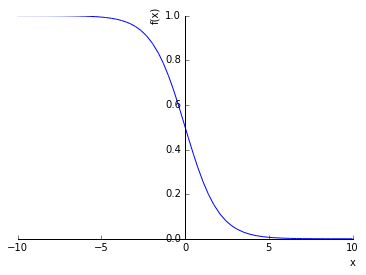

In [30]:
plot(1/(exp(x)+1),(x,-10,10))

A `plot_parametric` síkbeli általános parametrikus görbék ábrázolására szolgál

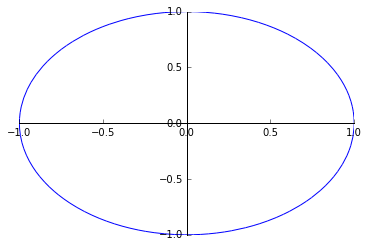

In [31]:
plot_parametric(sin(x),cos(x),(x,0,2*pi))

Térbeli görbék a `plot3d_parametric_line` függvénnyel jeleníthetők meg.

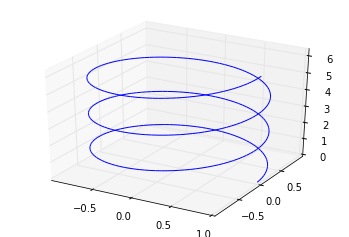

In [32]:
plot3d_parametric_line(cos(3*x),sin(3*x),x,(x,0,2*pi))

Térbeli felületek a ábrázolására a `plot3d` és `plot3d_parametric_surface` függvények szolgálnak:

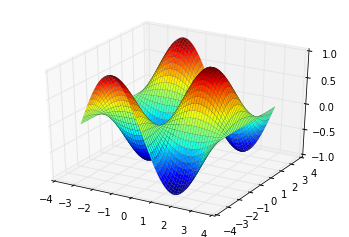

In [33]:
plot3d(sin(x)*cos(y),(x,-pi,pi),(y,-pi,pi))

In [34]:
 u, v = symbols('u v')

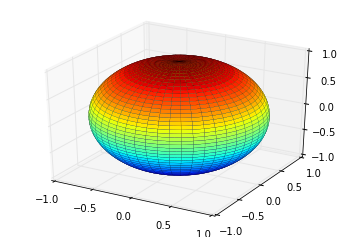

In [35]:
plot3d_parametric_surface(sin(v)*cos(u),sin(v)*sin(u),cos(v), (u, 0, 2*pi), (v, 0, pi))

## Egyszerűsítés

A sympy csomag [számos](http://docs.sympy.org/latest/tutorial/simplification.html) szimbolikus kifejezések egyszerűűb alakra hozását elősegítő metódussal rendelkezik. Az alábbiakban tekintsük át ezek közül a legegyszerűbbeket!

### Általános eset, a `simplify` fügvény

A legáltalánosabb egyszerűsítő függvény a `simplify`, mely különösebb specifikációk nélkül arra törekszik, hogy a hasában szereplő kifejezést a lehető legtömörebb alakra hozza. Lássunk erre néhány példát:

In [36]:
simplify(sin(x)**2 + cos(x)**2)

In [37]:
simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1))

Láttuk, hogy a fenti két példában valóban tömörebbre sikerült hozni egy-egy bonyolultabb kifejezést, lássunk egy ellenpéldát is! A `simplify` az alábbi, talán sokak számára könnyen egyszerűsíthető kifejezést nem egyszerűsíti tovább:

In [38]:
simplify(x**2 + 2*x +1)

A fenti jelenség oka az, hogy algoritmikusan nehéz jól definiálni az 'egyszerűsítés' fogalmát. Ha kicsit jobban kifejtjük hogy milyen egyszerűsítésre gondolunk, akkor már könnyebb dolga van a `sympy`-nak is. Az alábbiakban megismerkedünk néhány olyan függvénnyel, ami kifejezések specifikus egyszerűsítésére vagy éppen kibontására ad lehetőséget.

### Polinomiális és racionális kifejezések

Az `expand()` függvény segítségével legegyszerűbb esetben polinomiális kifejezéseket bonthatunk ki:

In [39]:
expand((x+y)**3)

A `factor()`  függvény talán egy kicsit az `expand()` függvény ellenkezője. A `factor` függvény a kapott kifejezést a lehető legtömörebb szorzatalakba próbálja hozni. Így például a `simplify` által nem egyszerűsített kifejezés a `factor()` segítségével:

In [40]:
factor(x**2 + 2*x +1)

a várt egyszerűbb alakra alakul. 

Általánosabb többváltozós polinomiális kifejezések manipulálása során előfordul, hogy egy bizonyos változó szerint szeretnénk a polinomot rendezni. Erre való a `collect()` függvény. Lássunk erre is egy példát:

In [41]:
kifejezes=x*y + x - 3 + 2*x**2 - z*x**2 + x**3

In [42]:
collect(kifejezes,x)

In [43]:
xek=collect(kifejezes,x)

A `coeff()`  metódussal pedig megkaphatjuk a polinom megfelelő hatványkitevőihez tartozó együtthatókat:

In [44]:
xek.coeff(x,2)

A `cancel()` függvény racionális (polinom/polinom) kifejezések egyszerűsítésére szolgál:

In [45]:
cancel((x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1))

Az `apart()` a [parciális törtekre](http://en.wikipedia.org/wiki/Partial_fraction_decomposition) bontást végző függvény:

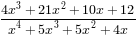

In [46]:
expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)
expr

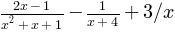

In [47]:
apart(expr)

### Trigonometrikus függvényeket tartalmazó kifejezések

Trigonometrikus függvényeket tartalmazó kifejezések kezelésére két metódus szolgál: 

A `trigsimp()` trigonometrikus azonosságokat figyelembe véve a lehető legtömörebb kifejezés előállítására törekszik:

In [48]:
expr=sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4
expr

In [49]:
trigsimp(expr)

A `expand_trig()` függvény pedig olyan formulákká alakítja a trigonometrikus függvényeket tartalmazó kifejezéseket melyek argumentumai a lehető legegyszerűbbek... cserébe természetesen a végeredmény hosszabb lesz.

In [50]:
expand_trig(cos(4*x))

### Rewrite 

A `rewrite` metódus a `sympy` kifejezések általánosabb átírását teszi lehetővé. 
Alkalmazható például trigonometrikus kifejezések boncolgatására:

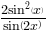

In [51]:
tan(x).rewrite(sin)

vagy trigonometrikus és exponenciális függvényeket tartalmazó kifejezések egymásba alakítására:

In [52]:
sin(x).rewrite(exp)

de más a `sympy` -ban implementált függvény azonosságokat kihasználó formulamanipulációra is:

In [53]:
factorial(x).rewrite(gamma) # a faktoriális és a gamma függvény kapcsolata

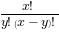

In [54]:
binomial(x,y).rewrite(factorial) # a binomiális eggyütthatók és a faktoriális kapcsolata

A fentiekben a `sympy` formula manipulációs képességeit csak nagyon felületesen vizsgáltuk meg. Bővebb információért érdemes a megfelelő függvények dokumentációit, illetve magát a `sympy` [documentációt](http://docs.sympy.org/latest/index.html) böngészni!

## Analitikus Lineáris algebra

A `sympy` segítségével paraméteres lineáris algebrai problémákat is megoldhatunk. Ilyen problámák kezelésére a `sympy` modul a  `Matrix` osztályt vezeti be. **Figyelem**, nem összekeverendő ez a modul a `numpy` numerikus `matrix`, illetve `array` osztályaival**!**
Az alábbiakban egy pár példán keresztül illusztráljuk a szimbolikus mátrixok létrehozását és a rajtuk végrehajtható műveletek viselkedését. 
Hozzunk létre két egyszerű 2x2-es mátrixot! 

In [55]:
M=Matrix([[0, -x*exp(I*y)],
          [-x*exp(-I*y), 0]])
M

⎡              ⅈ⋅y⎤
⎢   0      -x⋅ℯ   ⎥
⎢                 ⎥
⎢    -ⅈ⋅y         ⎥
⎣-x⋅ℯ         0   ⎦

In [56]:
B=Matrix([[1,2],
          [4,5]])
B

⎡1  2⎤
⎢    ⎥
⎣4  5⎦

Figyeljük meg, hogy az `M` mátrix elemei maguk is tartalmaznak `sympy` változókat, míg a `B` mátrix csak numerikus értékeket tartalmaz. 
A két mátrix a várható módon viselkedik, például össze tudjuk őket adni:

In [57]:
M+B

⎡                    ⅈ⋅y    ⎤
⎢      1        - x⋅ℯ    + 2⎥
⎢                           ⎥
⎢     -ⅈ⋅y                  ⎥
⎣- x⋅ℯ     + 4       5      ⎦

vagy össze tudjuk őket szorozni:

In [58]:
M*B

⎡      ⅈ⋅y        ⅈ⋅y ⎤
⎢-4⋅x⋅ℯ     -5⋅x⋅ℯ    ⎥
⎢                     ⎥
⎢    -ⅈ⋅y         -ⅈ⋅y⎥
⎣-x⋅ℯ       -2⋅x⋅ℯ    ⎦

Természetesen a szorzás eredménye függ a sorrendtől!

In [59]:
B*M

⎡      -ⅈ⋅y       ⅈ⋅y ⎤
⎢-2⋅x⋅ℯ       -x⋅ℯ    ⎥
⎢                     ⎥
⎢      -ⅈ⋅y        ⅈ⋅y⎥
⎣-5⋅x⋅ℯ      -4⋅x⋅ℯ   ⎦

Mátrixokra a hatványozás művelet nem elemenként, hanem mátrixhatványozásként hat!

In [60]:
M**2

⎡ 2    ⎤
⎢x   0 ⎥
⎢      ⎥
⎢     2⎥
⎣0   x ⎦

Mátrix inverzét is meg tudjuk határozni a `**`-operátorral:

In [61]:
B**(-1)

⎡-5/3  2/3 ⎤
⎢          ⎥
⎣4/3   -1/3⎦

Létezik néhány függvény, ami a mátrixok létrehozását szolgálja. Az `eye()` tetszőleges méretű egységmátrixot hoz létre:

In [62]:
eye(3)

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

A `diag()` függvény diagonális struktúrájú mátrixok gyártására való:

In [63]:
diag(sin(x),y,z)

⎡sin(x)  0  0⎤
⎢            ⎥
⎢  0     y  0⎥
⎢            ⎥
⎣  0     0  z⎦

Ahhoz, hogy néhány alapvető lineáris algebrai feladatot meg tudjunk oldani, szükség lesz oszlop- illetve sorvektorokra is. Ezeket is le tudjuk gyártani a `Matrix` osztály segítségével:

In [64]:
v=Matrix([[1,2]])
v

[1  2]

In [65]:
w=Matrix([[1],[2]])
w

⎡1⎤
⎢ ⎥
⎣2⎦

A mátrix-vektor szorzás a már megszokott módon történik:

In [66]:
B*w

⎡5 ⎤
⎢  ⎥
⎣14⎦

In [67]:
v*B

[9  12]

Mátrixokkal és vektorokkal megadott lineáris egyenletrendszerek megoldására kínál lehetőséget a `Matrix` osztály `solve()` metódusa. Például a fent definiált `B` és `w` változók által meghatározott $$Bx=w$$ lineáris problémát az alábbi módon oldhatjuk meg:

In [68]:
B.solve(w)

⎡-1/3⎤
⎢    ⎥
⎣2/3 ⎦

Egy mátrix determinánsa a `det`, a nyoma a `trace` metódussal számítható:

In [69]:
M.det()

In [70]:
B.trace()

A mátrix transzponáltja, illetve adjungáltja a `.T`, illetve `.H` konstrukcióval érhető el:

In [71]:
M.T

⎡             -ⅈ⋅y⎤
⎢   0     -x⋅ℯ    ⎥
⎢                 ⎥
⎢    ⅈ⋅y          ⎥
⎣-x⋅ℯ        0    ⎦

In [72]:
M.H

⎡              _  ⎤
⎢            ⅈ⋅y _⎥
⎢   0      -ℯ   ⋅x⎥
⎢                 ⎥
⎢     _           ⎥
⎢  -ⅈ⋅y _         ⎥
⎣-ℯ    ⋅x     0   ⎦

A fenti eredményben a változók fölé húzott vonal a komplex konjugáltat jelöli.

Egy mátrix sajátértékproblémájának vizsgálatára az `eigenvals()` és `eigenvects()` metódusok szolgálnak.
Az `eigenvals()` egy dict-tel tér vissza, mely a sajátértékeket kulcsszóként tartalmazza, a kulcsokhoz tartozó érték pedig a sajátérték degenerációjának fokát jelzi:

In [73]:
M.eigenvals()

Az `eigenvects()` a sajátértékeket, a multiplicitásukat és a sajátértékhez tartozó sajátvektorokat adja vissza:

In [74]:
M.eigenvects()

⎡⎛       ⎡⎡ ⅈ⋅y⎤⎤⎞  ⎛      ⎡⎡  ⅈ⋅y⎤⎤⎞⎤
⎢⎜-x, 1, ⎢⎢ℯ   ⎥⎥⎟, ⎜x, 1, ⎢⎢-ℯ   ⎥⎥⎟⎥
⎢⎜       ⎢⎢    ⎥⎥⎟  ⎜      ⎢⎢     ⎥⎥⎟⎥
⎣⎝       ⎣⎣ 1  ⎦⎦⎠  ⎝      ⎣⎣  1  ⎦⎦⎠⎦